In [5]:
import pickle
import pandas as pd
from features.pkl import PickleFeatureWriter
from datasets.pickle_dataset import MultiPickleDataset
import os
from torch.utils.data import DataLoader
from pathlib import Path
from models.esvs import V_MTRN, N_MTRN
from torch.optim import Adam
import torch
from frame_sampling import RandomSampler
from scripts.train_mtrn import train_test_loader
from systems import EpicActionRecogintionShapleyClassifier
from livelossplot import PlotLosses
import numpy as np
from torchvideo.samplers import frame_idx_to_list

In [31]:
train = Path('/mnt/storage/home/jb18789/scratch/datasets/epic-100/features/67217_train_features.pkl')
test = Path('/mnt/storage/home/jb18789/scratch/datasets/epic-100/features/9668_val_features.pkl')

# with open(test, 'rb') as f:
#     df = pickle.load(f)

# p.parent / f'{id}.pkl'\

In [5]:
os.path.getsize(p)

1071940023

In [3]:
def no_collate(args):
    return args

In [32]:
models = [V_MTRN(frame_count=i) for i in range(1,9)]
optims = [Adam(m.parameters(), lr=3e-4) for m in models]
frame_samplers = [RandomSampler(frame_count=m.frame_count, snippet_length=1,test=False) for m in models]

In [33]:
trainloader = DataLoader(MultiPickleDataset(train), batch_size=512, collate_fn=no_collate)
testloader = DataLoader(MultiPickleDataset(test), batch_size=512, collate_fn=no_collate)

In [34]:
classifier = EpicActionRecogintionShapleyClassifier(
    models[7],
    torch.device('cpu'),
    optims[7],
    frame_samplers[7],
    trainloader,
    testloader,
    'verb'
)


Classifier, model: <class 'models.esvs.V_MTRN'>, type: verb, frames: 8


In [17]:
df

{'length': 9668,
 'narration_id': ['P01_11_0',
  'P01_11_1',
  'P01_11_10',
  'P01_11_100',
  'P01_11_101',
  'P01_11_102',
  'P01_11_103',
  'P01_11_104',
  'P01_11_105',
  'P01_11_106',
  'P01_11_107',
  'P01_11_108',
  'P01_11_109',
  'P01_11_11',
  'P01_11_110',
  'P01_11_111',
  'P01_11_112',
  'P01_11_113',
  'P01_11_114',
  'P01_11_115',
  'P01_11_116',
  'P01_11_117',
  'P01_11_118',
  'P01_11_119',
  'P01_11_12',
  'P01_11_120',
  'P01_11_121',
  'P01_11_122',
  'P01_11_123',
  'P01_11_124',
  'P01_11_125',
  'P01_11_126',
  'P01_11_127',
  'P01_11_128',
  'P01_11_129',
  'P01_11_13',
  'P01_11_130',
  'P01_11_131',
  'P01_11_132',
  'P01_11_133',
  'P01_11_134',
  'P01_11_135',
  'P01_11_136',
  'P01_11_137',
  'P01_11_138',
  'P01_11_139',
  'P01_11_14',
  'P01_11_140',
  'P01_11_141',
  'P01_11_142',
  'P01_11_143',
  'P01_11_144',
  'P01_11_145',
  'P01_11_146',
  'P01_11_147',
  'P01_11_15',
  'P01_11_16',
  'P01_11_17',
  'P01_11_18',
  'P01_11_19',
  'P01_11_2',
  'P01_

In [19]:
xd = iter(testloader)
woddy = xd.next()
woddy

[(array([[ -3.787646 ,  27.886145 ,  -5.4291744, ...,  -5.720755 ,
           36.021317 ,  -4.359195 ],
         [ -3.7918136,  27.797483 ,  -5.5763116, ...,  -5.7223716,
           35.942642 ,  -4.360745 ],
         [ -3.809136 ,  27.99939  ,  -5.1846175, ...,  -5.7151923,
           36.52393  ,  -4.376121 ],
         ...,
         [ -3.8706796,  13.580647 , -14.151562 , ...,  -5.282632 ,
           49.29699  ,  -4.051368 ],
         [ -3.8711371,  13.5403   , -14.134388 , ...,  -5.2840176,
           49.275356 ,  -4.056271 ],
         [ -3.9142551,  12.450764 , -15.009375 , ...,  -5.318194 ,
           50.899246 ,  -4.089582 ]], dtype=float32),
  {'narration_id': 'P01_11_0',
   'verb_class': tensor([0]),
   'noun_class': tensor([2])}),
 (array([[ -3.1719153,  11.981986 ,  -6.0026536, ...,  -4.3184376,
           38.255154 ,  -3.2800336],
         [ -3.172336 ,  11.857045 ,  -5.963176 , ...,  -4.317905 ,
           38.254845 ,  -3.2782133],
         [ -3.229881 ,  11.484745 ,  -5.9239

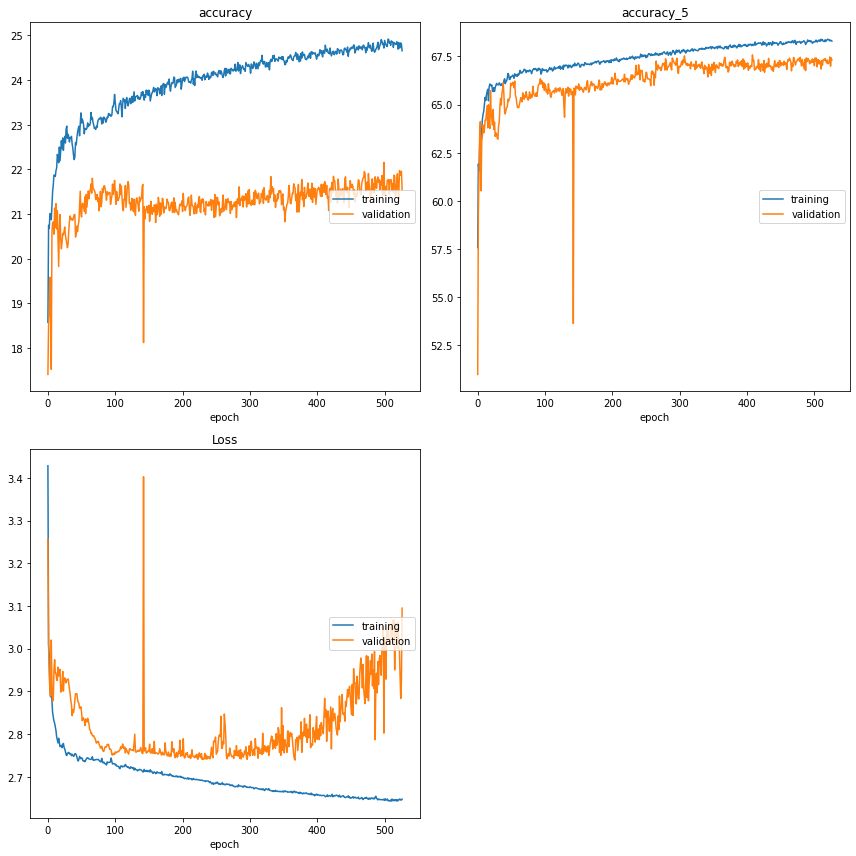

accuracy
	training         	 (min:   18.575, max:   24.918, cur:   24.656)
	validation       	 (min:   17.408, max:   22.158, cur:   21.552)
accuracy_5
	training         	 (min:   57.577, max:   68.398, cur:   68.298)
	validation       	 (min:   50.988, max:   67.581, cur:   67.311)
Loss
	training         	 (min:    2.643, max:    3.428, cur:    2.648)
	validation       	 (min:    2.739, max:    3.403, cur:    3.095)


KeyboardInterrupt: 

In [36]:
liveloss = PlotLosses()
for epoch in range(1000):
    logs = {}
    
    train_result = classifier.train_step()
    
    epoch_loss = sum(train_result[f'{models[7].frame_count}_loss']) / len(trainloader)
    epoch_acc1 = sum(train_result[f'{models[7].frame_count}_acc1']) / len(trainloader)
    epoch_acc5 = sum(train_result[f'{models[7].frame_count}_acc5']) / len(trainloader)
    
    test_result = classifier.test_step()
    
    epoch_loss_ = sum(test_result[f'{models[7].frame_count}_loss']) / len(testloader)
    epoch_acc1_ = sum(test_result[f'{models[7].frame_count}_acc1']) / len(testloader)
    epoch_acc5_ = sum(test_result[f'{models[7].frame_count}_acc5']) / len(testloader)
    
    logs['loss'] = epoch_loss
    logs['accuracy'] = epoch_acc1
    logs['accuracy_5'] = epoch_acc5
    logs['val_loss'] = epoch_loss_
    logs['val_accuracy'] = epoch_acc1_
    logs['val_accuracy_5'] = epoch_acc5_

    liveloss.update(logs)
    liveloss.send()

In [23]:
class h_mask(object):
    def __init__(self, p: float=0.5):
        self.p = p
        
    def __call__(self, sample):
        x = np.random.choice([0,1], p=[1-self.p, self.p])
        if x:
            

SyntaxError: unexpected EOF while parsing (<ipython-input-23-bce56f9603a8>, line 9)

In [36]:
it = iter(trainloader)
x = it.next()

In [45]:
def _sample_frames(data):
    features = []
    labels = {}
    for feature, label in data:
        video_length = feature.shape[0]
        if video_length < frame_samplers[3].frame_count:
            raise ValueError(f"Video too short to sample {frame_samplers[3].frame_count} from")
        idxs = np.array(frame_idx_to_list(frame_samplers[3].sample(video_length)))
        features.append(feature[idxs])
        for k in label.keys():
            if k in labels:
                labels[k].append(label[k])
            else:
                labels[k] = [label[k]]

    for k in labels.keys():
        try:
            labels[k] = torch.tensor(labels[k])
        except ValueError:
            pass

    return torch.tensor(features, dtype=torch.float), labels

In [46]:
alie = _sample_frames(x)

In [66]:
data, labels = _sample_frames(x)

In [67]:
data

tensor([[[ -4.7028,   7.0160,   1.3524,  ...,  -5.4622,  62.8877,  -3.8441],
         [ -4.8337,   8.5421,   2.8815,  ...,  -5.5607,  61.8090,  -4.0325],
         [ -4.7991,   7.6369,   2.9171,  ...,  -5.4934,  61.0469,  -3.9521],
         [ -4.5849,   8.7491,   1.8933,  ...,  -5.4643,  59.0576,  -3.8343]],

        [[ -5.8763,  10.6428, -20.3478,  ...,  -7.1526,  65.8568,  -5.0250],
         [ -5.2562,  18.9106, -15.7246,  ...,  -6.5095,  58.9448,  -4.4886],
         [ -5.1825,  19.5927, -15.9073,  ...,  -6.4973,  57.4300,  -4.4691],
         [ -5.8751,  19.9454, -21.0092,  ...,  -7.2996,  60.6897,  -4.9820]],

        [[ -3.7806,  16.0529,   3.7001,  ...,  -4.8682,  48.3093,  -3.4146],
         [ -3.7726,  13.6561,  -1.5862,  ...,  -4.8697,  49.1320,  -3.4256],
         [ -3.7685,  13.7954,  -1.5068,  ...,  -4.8680,  49.0924,  -3.4238],
         [ -4.6618,  15.1914,   0.2839,  ...,  -5.9085,  56.7995,  -3.9786]],

        ...,

        [[ -4.0059,   5.4779,  -6.8453,  ...,  -5.1225, 